In [1]:
#importamos librerias necesarias

import pandas as pd
import numpy as np



In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import warnings
warnings.filterwarnings("ignore")

Hipotesis 1) dormir poco o mal afecta negativamente a la salud
Hipotesis 2) El numero recomendable de horas de sueño es ente 7-8
Hipotesis 3) (relacion bidireccional) unos malos habitos de vida afectan negativamente a las horas y caldiad de sueño


In [3]:
#importamos base de datos
sueño_salud = pd.read_csv('C:\\Users\\juanc\\Desktop\\proyecto\\2-Data_Analysis\\Entregas\\Entregas\\EDA\\Proyecto_EDA.ipynb\\Base de datos\\Sleep_health_and_lifestyle_dataset.csv')
sueño_salud

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
sueño_salud.head(50)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [5]:
sueño_salud['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [6]:
sueño_salud['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [7]:
#ver cuantas filas y columnas
sueño_salud.shape


(374, 13)

In [8]:
#miramos si hay algun NAN
sueño_salud.info()
#en sleep disorder hay, debido a que si no tiene la persona se deja en blanco


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
sueño_salud.isnull().sum()



Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [10]:
#rellenar los nan con normal
sueño_salud =sueño_salud.fillna("Normal")



In [11]:
#ver si hay datos duplicados
sueño_salud.duplicated().sum()

0

In [12]:
sueño_salud.describe()
#la gente duerme entre 5-9 horas
#califan su sueño entre un 4-9 y el stress entre 3-8 => no ponen valores extremos
#la media de horas dormidas es 7.3

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [13]:
#la moda es parecida a la media
sueño_salud["Sleep Duration"].mode()

0    7.2
Name: Sleep Duration, dtype: float64

In [14]:
#checkear que cada columna es el tipo de dato que deberia
print(sueño_salud['Age'].dtype)
print(sueño_salud['Sleep Duration'].dtype)
print(sueño_salud['Quality of Sleep'].dtype)
print(sueño_salud['Physical Activity Level'].dtype)
print(sueño_salud['Stress Level'].dtype)
print(sueño_salud['Heart Rate'].dtype)
print(sueño_salud['Daily Steps'].dtype)
print(sueño_salud['Gender'].dtype)
print(sueño_salud['Blood Pressure'].dtype)

int64
float64
int64
int64
int64
int64
int64
object
object


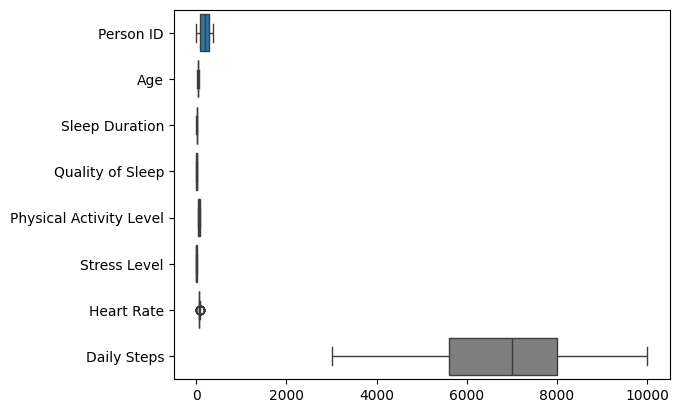

In [15]:
#no hay outliers, solo heart rate
sns.boxplot(sueño_salud, orient= 'h');

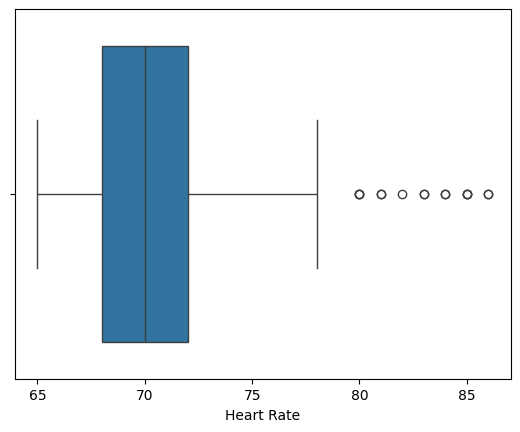

In [16]:
#Tiene sentido estos valores y no son desproporcionados los dejamos. Es la unica variable con outlier
sns.boxplot(sueño_salud["Heart Rate"], orient= 'h');

In [17]:
import numpy as np
import seaborn as sns

In [18]:
#elimino columnas ID y Occupation
sueño_salud.pop('Occupation')

0         Software Engineer
1                    Doctor
2                    Doctor
3      Sales Representative
4      Sales Representative
               ...         
369                   Nurse
370                   Nurse
371                   Nurse
372                   Nurse
373                   Nurse
Name: Occupation, Length: 374, dtype: object

In [19]:
sueño_salud.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,6.1,6,42,6,Overweight,126/83,77,4200,Normal
1,2,Male,28,6.2,6,60,8,Normal,125/80,75,10000,Normal
2,3,Male,28,6.2,6,60,8,Normal,125/80,75,10000,Normal
3,4,Male,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [20]:
#cambiar el genero a 0 y 1 para poder sacar la correlacion
mapeo = {'Male': 0, 'Female': 1}
sueño_salud['Gender'] = sueño_salud['Gender'].replace(mapeo)

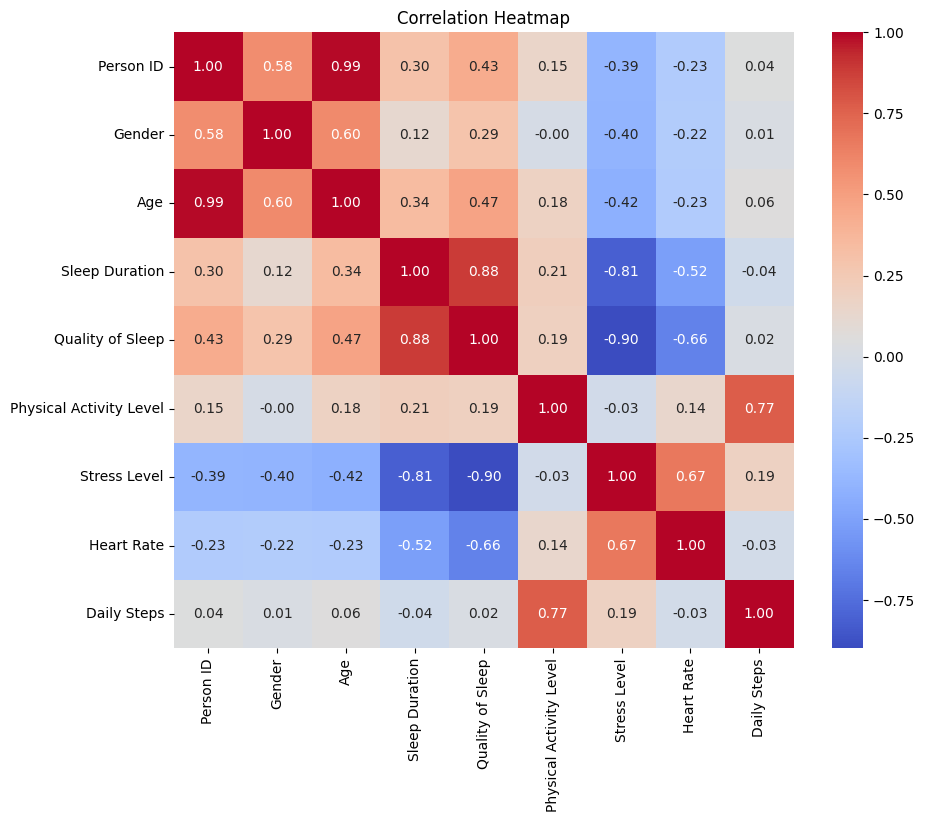

In [21]:
#mapa de correlacion

numeros = sueño_salud.select_dtypes(include=['float64', 'int64'])
# Compute the correlation matrix
correlation_matrix = numeros.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [22]:
import matplotlib.pyplot as plt

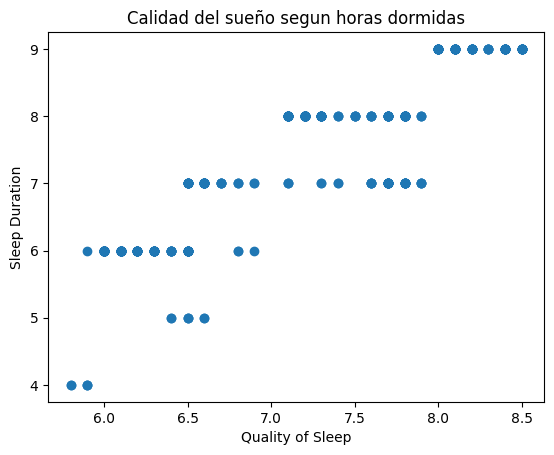

In [23]:
plt.scatter(sueño_salud['Sleep Duration'], sueño_salud['Quality of Sleep'])
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration')
plt.title('Calidad del sueño segun horas dormidas')
plt.show()

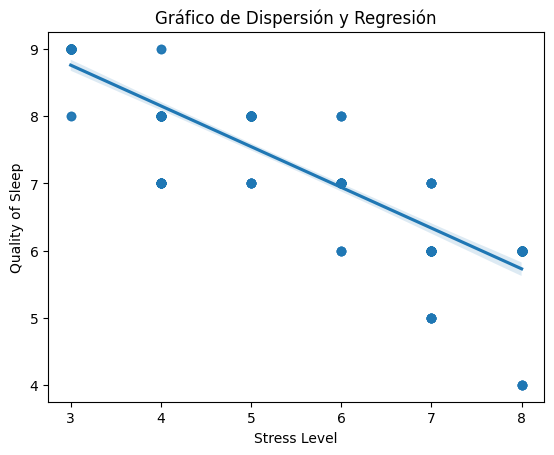

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


# Crear el gráfico de dispersión con línea de regresión
sns.regplot(x='Stress Level', y='Quality of Sleep', data=sueño_salud)

# Etiqueta y título
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.title('Gráfico de Dispersión y Regresión')

# Mostrar el gráfico
plt.show()

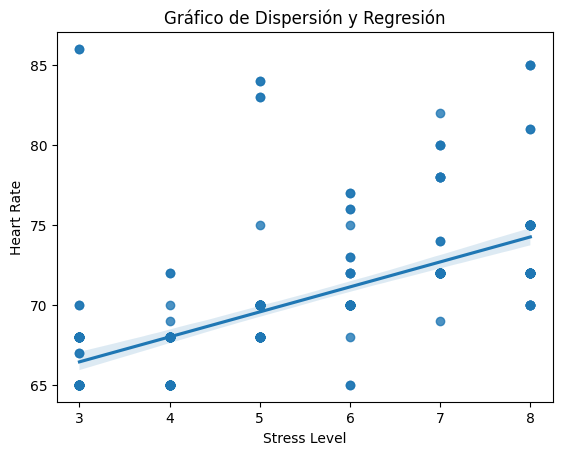

In [25]:
# Crear el gráfico de dispersión con línea de regresión
sns.regplot(x='Stress Level', y='Heart Rate', data=sueño_salud)

# Etiqueta y título
plt.xlabel('Stress Level')
plt.ylabel('Heart Rate')
plt.title('Gráfico de Dispersión y Regresión')

# Mostrar el gráfico
plt.show()

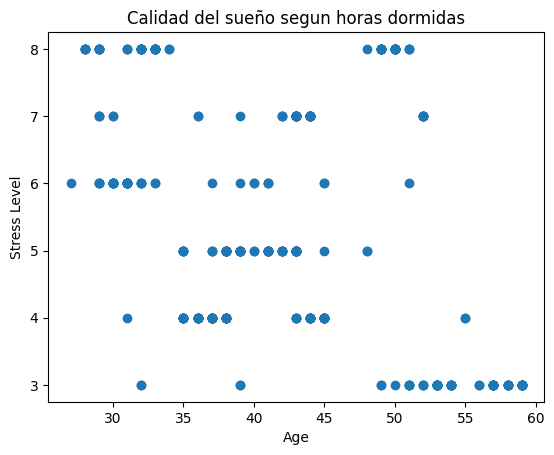

In [26]:
plt.scatter(sueño_salud['Age'], sueño_salud['Stress Level'])
plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.title('Calidad del sueño segun horas dormidas')
plt.show()

In [27]:
sueño_salud[sueño_salud["Stress Level"]<5]["Age"].value_counts()

Age
53    17
59    16
37    16
44    11
45    11
36    10
57     9
38     8
35     7
54     7
58     6
43     4
51     4
52     3
55     2
56     2
49     2
32     2
39     2
50     1
31     1
Name: count, dtype: int64

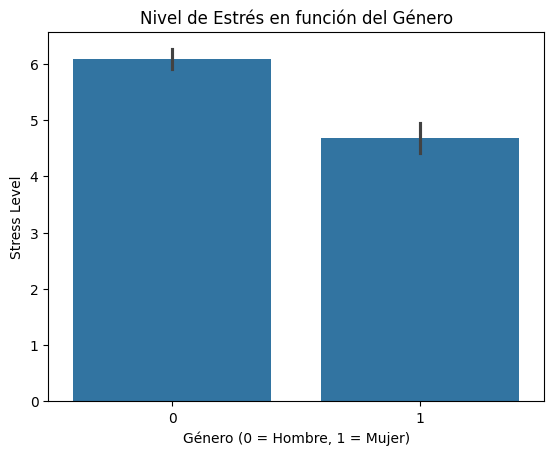

In [28]:
# Crear el gráfico de barras
sns.barplot(x='Gender', y='Stress Level', data=sueño_salud)

# Etiquetas y título
plt.xlabel('Género (0 = Hombre, 1 = Mujer)')
plt.ylabel('Stress Level')
plt.title('Nivel de Estrés en función del Género')

# Mostrar el gráfico
plt.show()

In [29]:
sueño_salud.groupby('BMI Category')['BMI Category'].value_counts()


BMI Category
Normal           195
Normal Weight     21
Obese             10
Overweight       148
Name: count, dtype: int64

In [46]:
mascara = {'Male': 0, 'Female': 1}
sueño_salud['Gender'] = sueño_salud['Gender'].replace(mascara)
sueño_salud['BMI Category'] = sueño_salud['BMI Category'].replace('Normal Weight', 'Underweight')
sueño_salud['BMI Category Binary'] = sueño_salud['BMI Category'].apply(lambda x: 1 if x in ['Obese', 'Overweight'] else 0)

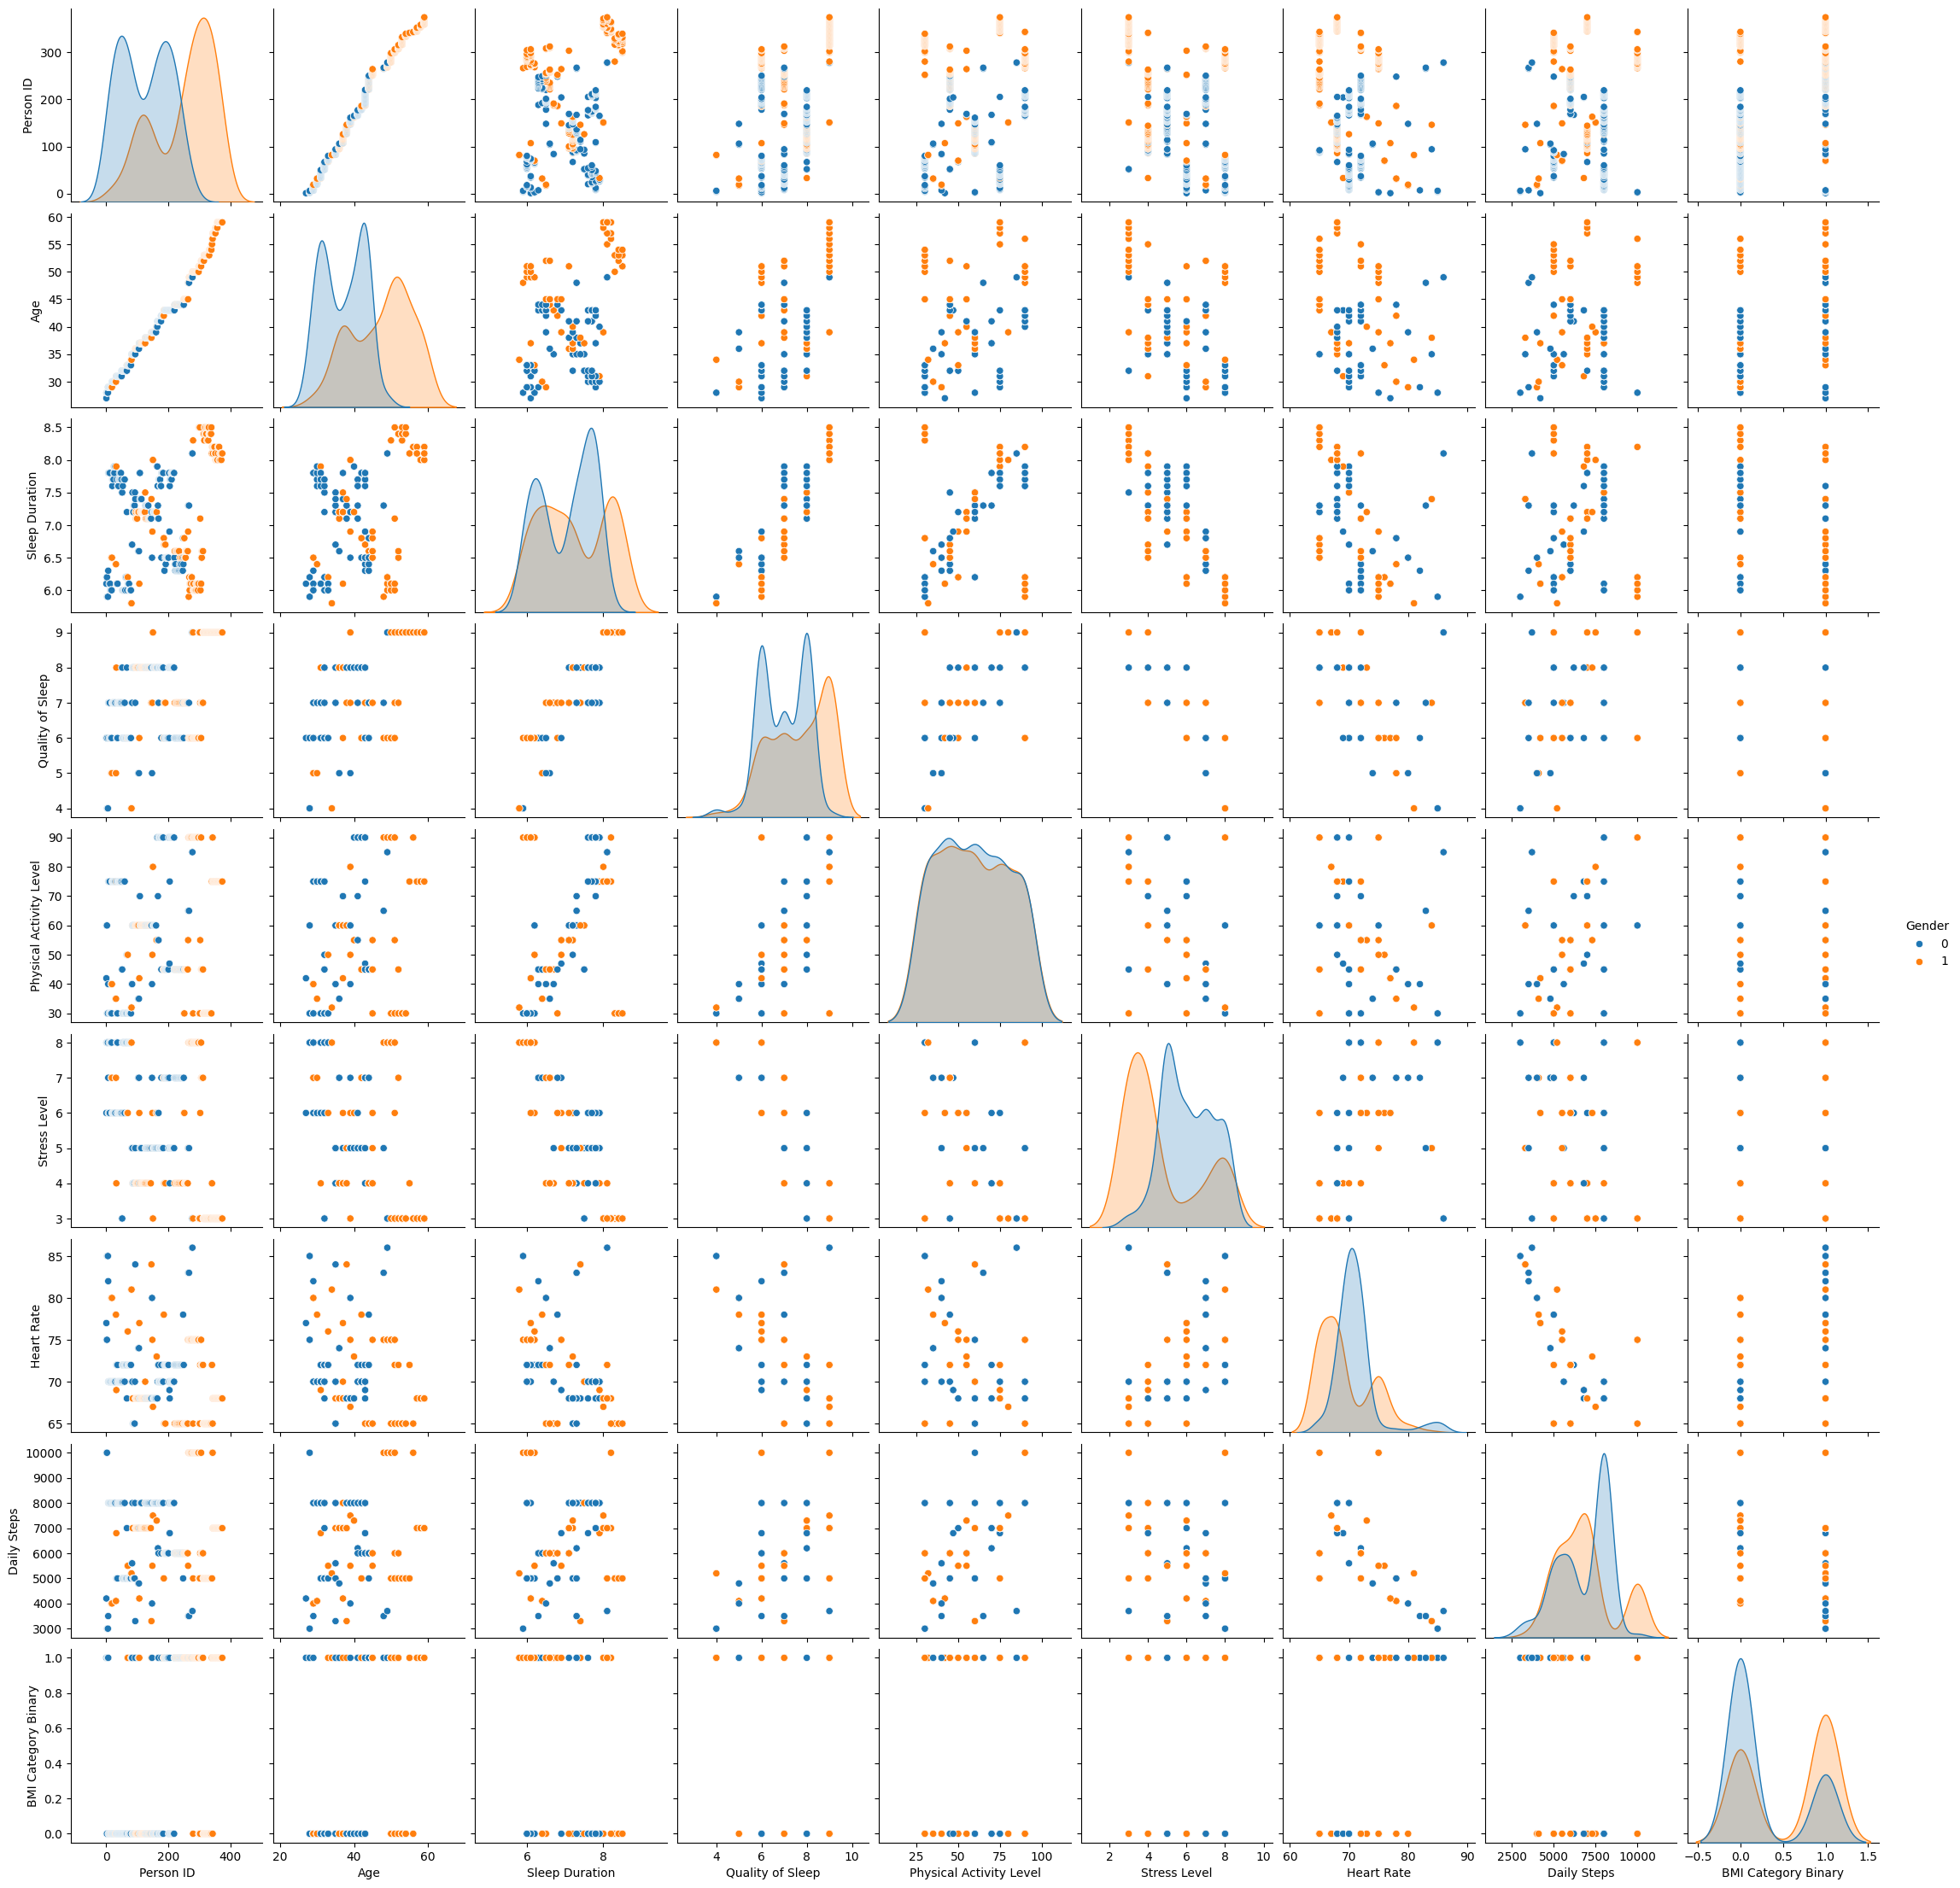

In [47]:
sns.pairplot(sueño_salud, hue= 'Gender')

<Axes: xlabel='Quality of Sleep', ylabel='Count'>

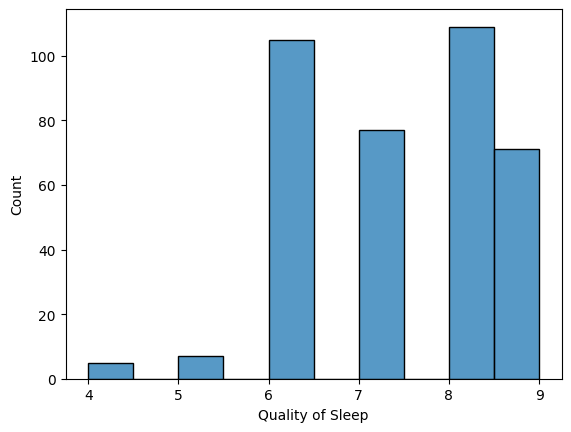

In [31]:
sns.histplot(x = 'Quality of Sleep', data = sueño_salud)

<Axes: xlabel='Sleep Duration', ylabel='Count'>

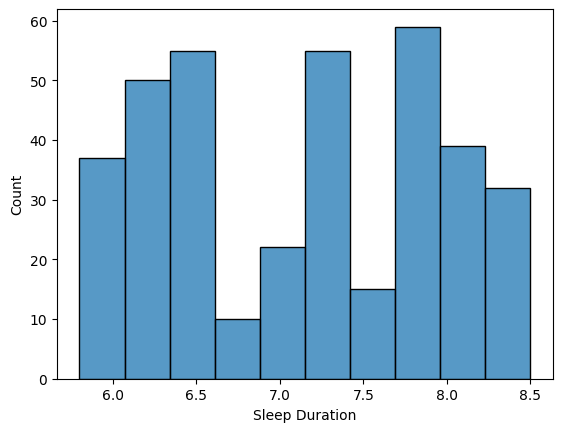

In [32]:
sns.histplot(x = 'Sleep Duration', data = sueño_salud)

<Axes: xlabel='Sleep Disorder', ylabel='Count'>

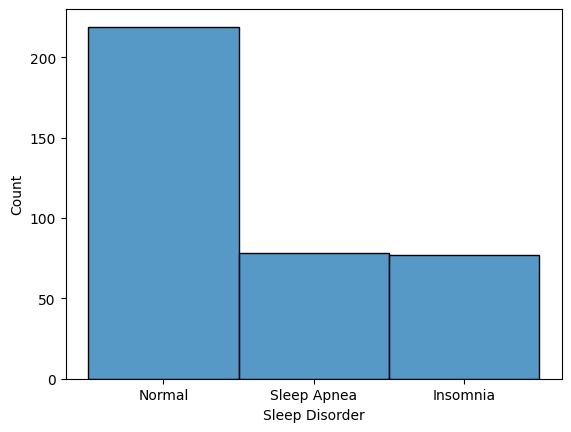

In [33]:
sns.histplot(x = 'Sleep Disorder', data = sueño_salud)

In [34]:
sueño_salud.groupby("Sleep Disorder")[["Quality of Sleep","Sleep Duration"]].agg(['mean', 'median'])

Quality of Sleep        Sleep Duration       
                           mean median           mean median
Sleep Disorder                                              
Insomnia               6.532468    7.0       6.589610    6.5
Normal                 7.625571    8.0       7.358447    7.4
Sleep Apnea            7.205128    6.0       7.032051    6.8

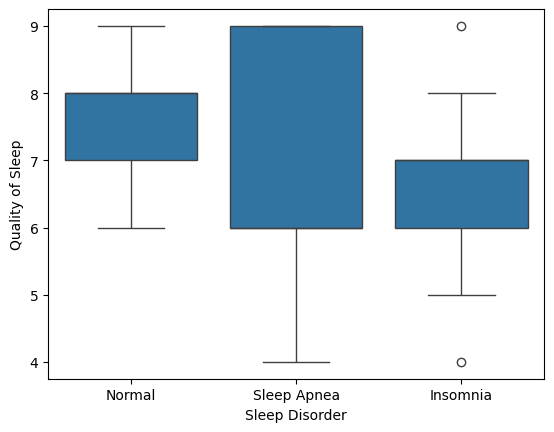

In [35]:
sns.boxplot (data=sueño_salud, x="Sleep Disorder", y="Quality of Sleep")
plt.show()

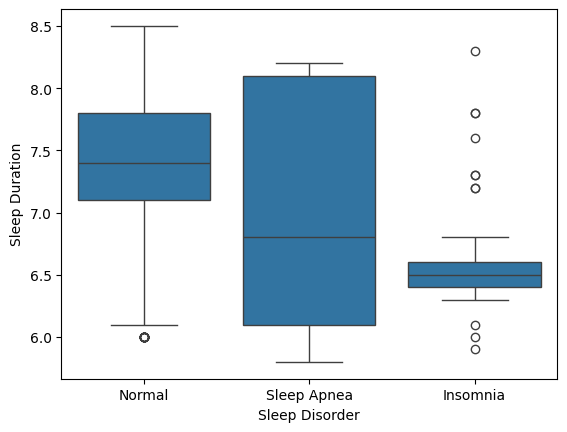

In [36]:
sns.boxplot (data=sueño_salud, x="Sleep Disorder", y="Sleep Duration")
plt.show()
#algunos de insomnia estan durmiendo mucho, quizas estan medicados


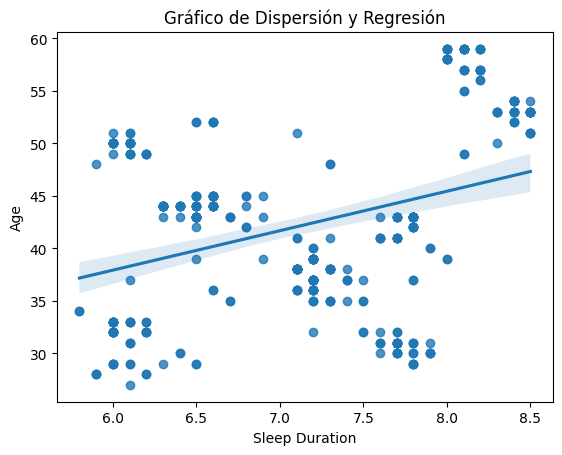

In [37]:
sns.regplot(x='Sleep Duration', y='Age', data=sueño_salud)

# Etiqueta y título
plt.xlabel('Sleep Duration')
plt.ylabel('Age')
plt.title('Gráfico de Dispersión y Regresión')

# Mostrar el gráfico
plt.show()

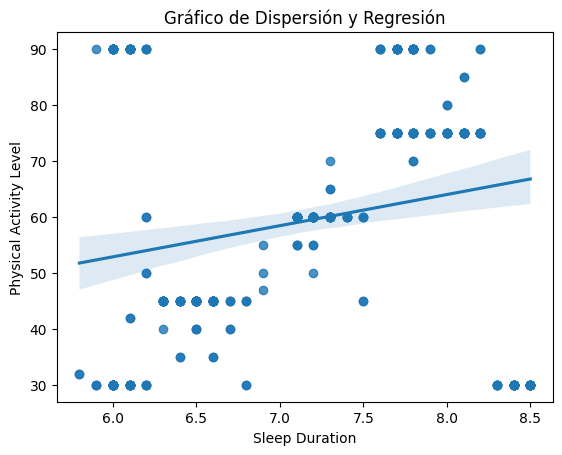

In [38]:
sns.regplot(x='Sleep Duration', y='Physical Activity Level', data=sueño_salud)

# Etiqueta y título
plt.xlabel('Sleep Duration')
plt.ylabel('Physical Activity Level')
plt.title('Gráfico de Dispersión y Regresión')

# Mostrar el gráfico
plt.show()

In [39]:
sueño_salud[(sueño_salud['Sleep Duration'] > 8) & (sueño_salud['Physical Activity Level'] < 40)]


,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
279,280,1,50,8.3,9,30,3,Normal,125/80,65,5000,Normal
298,299,1,51,8.5,9,30,3,Normal,125/80,65,5000,Normal
299,300,1,51,8.5,9,30,3,Normal,125/80,65,5000,Normal
300,301,1,51,8.5,9,30,3,Normal,125/80,65,5000,Normal
301,302,1,51,8.5,9,30,3,Normal,125/80,65,5000,Normal
312,313,1,52,8.4,9,30,3,Normal,125/80,65,5000,Normal
313,314,1,52,8.4,9,30,3,Normal,125/80,65,5000,Normal
314,315,1,52,8.4,9,30,3,Normal,125/80,65,5000,Normal
315,316,1,53,8.3,9,30,3,Normal,125/80,65,5000,Insomnia
316,317,1,53,8.5,9,30,3,Normal,125/80,65,5000,Normal


In [40]:
#AL hacer deporte se duerme mucho mejor a menos que tenga sleep apnea
#La gente que tiene sleep apnea tiene sobrepeso
sueño_salud[(sueño_salud['Sleep Duration'] < 6.5) & (sueño_salud['Physical Activity Level'] >80)]

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
265,266,1,48,5.9,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
267,268,1,49,6.2,6,90,8,Overweight,140/95,75,10000,Normal
268,269,1,49,6.0,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
269,270,1,49,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
270,271,1,49,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
271,272,1,49,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
272,273,1,49,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
273,274,1,49,6.2,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
274,275,1,49,6.2,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
275,276,1,49,6.2,6,90,8,Overweight,140/95,75,10000,Sleep Apnea


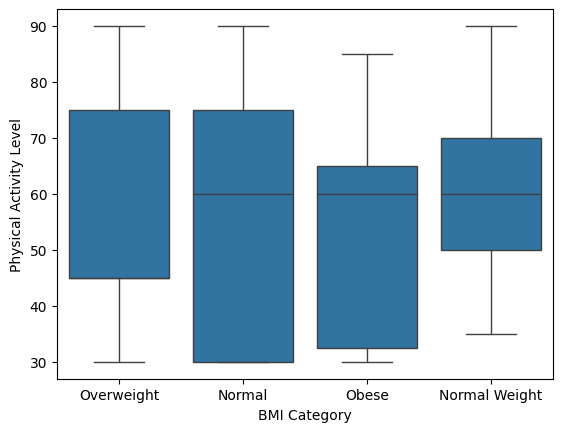

In [41]:
sns.boxplot (data=sueño_salud, x="BMI Category", y="Physical Activity Level")
plt.show()
# RARO pero no hay relacion entre el peso y la cantidad de actividad fisica


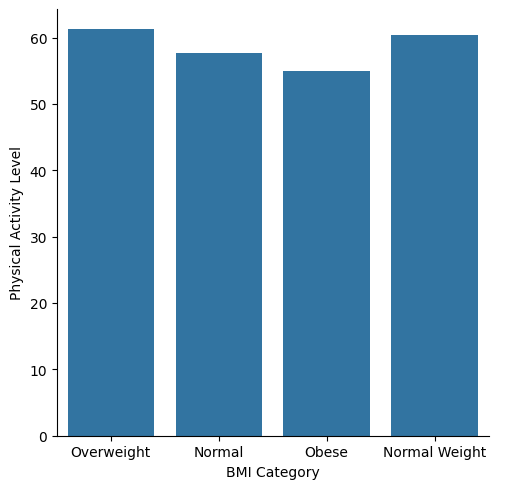

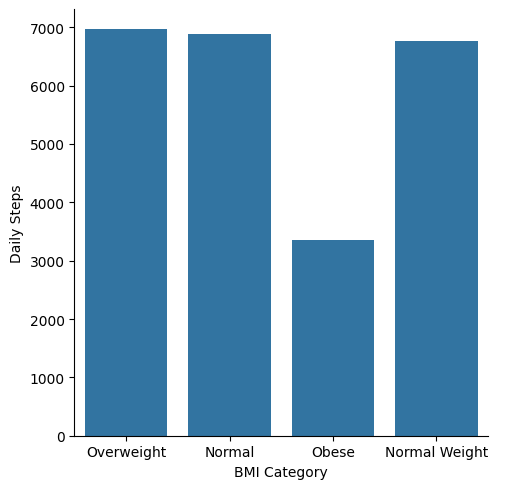

In [42]:
sns.catplot(x='BMI Category', y='Physical Activity Level', data=sueño_salud, kind='bar', ci=None)
sns.catplot(x='BMI Category', y='Daily Steps', data=sueño_salud, kind='bar', ci=None)

In [43]:
sueño_salud[(sueño_salud['Sleep Duration'] < 6.5) & (sueño_salud['Physical Activity Level'] >80)]

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
265,266,1,48,5.9,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
267,268,1,49,6.2,6,90,8,Overweight,140/95,75,10000,Normal
268,269,1,49,6.0,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
269,270,1,49,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
270,271,1,49,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
271,272,1,49,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
272,273,1,49,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
273,274,1,49,6.2,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
274,275,1,49,6.2,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
275,276,1,49,6.2,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
